In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import gmaps

from api_keys import g_key

In [2]:
# Save config information.
location = "Summaries Weather/Resources Weather/regional_weather_data_project-one-.csv"
reg_wth = pd.read_csv(location)
calidata= pd.read_csv("Summaries Weather/Resources Weather/2015-2018_California_weather.csv")
calidata.rename(columns={"city_name":"state_name"},inplace=True)
reg_wth=reg_wth.append(calidata)

reg_wth
#clean_wth = reg_wth.dropna(axis = 'columns')
#clean_wth.head()

,dt,dt_iso,timezone,state_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1420070400,2015-01-01 00:00:00 +0000 UTC,-18000,Florida,27.664827,-81.515754,292.43,292.22,292.012,292.807,...,22,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
1,1420074000,2015-01-01 01:00:00 +0000 UTC,-18000,Florida,27.664827,-81.515754,292.34,292.19,291.866,292.786,...,26,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
2,1420077600,2015-01-01 02:00:00 +0000 UTC,-18000,Florida,27.664827,-81.515754,292.10,292.24,291.514,292.675,...,29,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
3,1420081200,2015-01-01 03:00:00 +0000 UTC,-18000,Florida,27.664827,-81.515754,292.14,292.44,291.529,292.755,...,32,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04n
4,1420084800,2015-01-01 04:00:00 +0000 UTC,-18000,Florida,27.664827,-81.515754,292.01,292.42,291.357,292.678,...,24,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35642,1546282800,2018-12-31 19:00:00 +0000 UTC,-28800,California,36.778261,-119.417932,6.12,3.45,0.000,9.070,...,242,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04d
35643,1546286400,2018-12-31 20:00:00 +0000 UTC,-28800,California,36.778261,-119.417932,7.18,4.70,0.560,10.560,...,244,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04d
35644,1546290000,2018-12-31 21:00:00 +0000 UTC,-28800,California,36.778261,-119.417932,7.78,5.04,0.000,10.930,...,253,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
35645,1546293600,2018-12-31 22:00:00 +0000 UTC,-28800,California,36.778261,-119.417932,8.77,6.45,0.560,11.670,...,271,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d


In [3]:
marketsalesev= pd.read_csv("Summaries Sales/2015-2018 EV Market Shares.csv")
marketsalesev.rename(columns={"Unnamed: 0":"States"},inplace=True)
marketsalesev

,States,2015-2018 All Market Share,% Market Share 2015-2018 BEV,% Market Share 2015-2018 PHEV,2015 All Market Share,% Market Share 2015 BEV,% Market Share 2015 PHEV,2016 All Market Share,% Market Share 2016 BEV,% Market Share 2016 PHEV,2017 All Market Share,% Market Share 2017 BEV,% Market Share 2017 PHEV,2018 All Market Share,% Market Share 2018 BEV,% Market Share 2018 PHEV
0,Alabama,1.42%,0.11%,0.11%,1.41%,0.03%,0.06%,1.35%,0.06%,0.11%,1.47%,0.08%,0.11%,1.44%,0.25%,0.16%
1,Alaska,1.88%,0.20%,0.20%,1.33%,0.09%,0.14%,1.84%,0.16%,0.24%,2.36%,0.17%,0.20%,2.05%,0.37%,0.22%
2,Arizona,3.17%,0.69%,0.32%,2.71%,0.27%,0.23%,2.80%,0.38%,0.28%,3.31%,0.55%,0.35%,3.77%,1.44%,0.39%
3,Arkansas,1.43%,0.08%,0.09%,1.26%,0.02%,0.04%,1.45%,0.03%,0.07%,1.51%,0.06%,0.10%,1.52%,0.21%,0.14%
4,California,9.81%,2.74%,2.18%,9.14%,1.74%,1.42%,8.61%,1.97%,1.77%,9.63%,2.58%,2.34%,11.87%,4.66%,3.18%
5,Colorado,3.57%,1.00%,0.51%,2.57%,0.50%,0.24%,3.01%,0.62%,0.45%,3.89%,1.00%,0.57%,4.72%,1.82%,0.78%
6,Connecticut,3.01%,0.58%,0.64%,2.28%,0.30%,0.29%,2.75%,0.34%,0.54%,3.29%,0.59%,0.80%,3.76%,1.09%,0.93%
7,Delaware,2.78%,0.31%,0.48%,2.30%,0.10%,0.27%,2.71%,0.14%,0.54%,2.98%,0.29%,0.57%,3.14%,0.70%,0.57%
8,DistrictofColumbia,4.99%,0.86%,0.74%,3.76%,0.34%,0.26%,3.99%,0.71%,0.51%,6.03%,0.90%,0.97%,7.21%,1.78%,1.56%
9,Florida,2.24%,0.36%,0.22%,2.29%,0.17%,0.13%,2.03%,0.26%,0.22%,2.22%,0.28%,0.25%,2.41%,0.74%,0.29%


In [4]:
climatecode=pd.read_csv("Summaries Weather/US Climates 2015 - 2018.csv")
climatecode.replace(np.nan, '',inplace=True)
climatecode

climatecode["Total"]=climatecode["Climate 1"]+climatecode["Climate 2"]+climatecode["Climate 3"]
climatecode

,States,Climate 1,Climate 2,Climate 3,Total
0,Alabama,C,,,C
1,Alaska,D,E,,DE
2,Arizona,B,C,D,BCD
3,Arkansas,C,,,C
4,California,B,C,D,BCD
5,Colorado,B,C,D,BCD
6,Connecticut,D,C,,DC
7,Delaware,C,,,C
8,Districtof,C,,,C
9,Florida,C,A,,CA


In [5]:
marketsalesevc=marketsalesev.loc[marketsalesev["States"]!="	DistrictofColumbia"]
CoordCenterStates=pd.read_csv("Summaries Weather/state coordinates.csv")
CoordCenterStates["EV Sales"]=marketsalesevc["2015-2018 All Market Share"]
CoordCenterStates["EV Market Share No String"] = CoordCenterStates["EV Sales"].str.rstrip('%').astype('float')
CoordCenterStates

,States,Latitude,Longitude,EV Sales,EV Market Share No String
0,Alabama,32.318230,-86.902298,1.42%,1.42
1,Alaska,66.160507,-153.369141,1.88%,1.88
2,Arizona,34.048927,-111.093735,3.17%,3.17
3,Arkansas,34.799999,-92.199997,1.43%,1.43
4,California,36.778259,-119.417931,9.81%,9.81
5,Colorado,39.113014,-105.358887,3.57%,3.57
6,Connecticut,41.599998,-72.699997,3.01%,3.01
7,Delaware,39.000000,-75.500000,2.78%,2.78
8,Florida,27.994402,-81.760254,4.99%,4.99
9,Georgia,33.247875,-83.441162,2.24%,2.24


In [6]:
reg_wth.groupby("weather_main")["state_name"].count()

weather_main
Clear           132147
Clouds           87888
Drizzle            767
Fog               1493
Haze              3422
Mist              9235
Rain              9156
Smoke              479
Snow              2119
Squall               1
Thunderstorm       970
Name: state_name, dtype: int64

In [7]:
population=pd.read_csv("Summaries Census/Census_total_population.csv")
population.drop(columns=["Unnamed: 0"],inplace=True)
population.sort_values(by=["State"],inplace=True)
population=population.loc[population["State"]!="Puerto Rico"].reset_index(drop=True)
population

,State,US Population 2015,US Population 2016,US Population 2017,US Population 2018
0,Alabama,4830620.0,4841164.0,4850771.0,4864680.0
1,Alaska,733375.0,736855.0,738565.0,738516.0
2,Arizona,6641928.0,6728577.0,6809946.0,6946685.0
3,Arkansas,2958208.0,2968472.0,2977944.0,2990671.0
4,California,38421464.0,38654206.0,38982847.0,39148760.0
5,Colorado,5278906.0,5359295.0,5436519.0,5531141.0
6,Connecticut,3593222.0,3588570.0,3594478.0,3581504.0
7,Delaware,926454.0,934695.0,943732.0,949495.0
8,District of Columbia,647484.0,659009.0,672391.0,684498.0
9,Florida,19645772.0,19934451.0,20278447.0,20598139.0


In [8]:
rawsales=pd.read_csv("Summaries Sales/All EV Sales 2015 - 2018.csv")
rawsales["2018 no comma"] = rawsales["2018"].replace(",","",regex=True).astype("int")
rawsales["per capita 2018 %"]=rawsales["2018 no comma"]/population["US Population 2018"]*100
rawsales["climate"]=climatecode["Total"]

rawsales

,States,EVs sold from 2015-2018,2015,2016,2017,2018,2018 no comma,per capita 2018 %,climate
0,Alabama,"11,464","2,825","2,730","2,889","3,020",3020,0.062080,C
1,Alaska,"1,868",348,436,542,542,542,0.073390,DE
2,Arizona,"44,174","9,045","9,585","11,003","14,541",14541,0.209323,BCD
3,Arkansas,"7,091","1,578","1,847","1,798","1,868",1868,0.062461,C
4,California,765887,178380,169743,185395,232369,232369,0.593554,BCD
5,Colorado,"37,320","6,634","7,611","10,320","12,755",12755,0.230603,BCD
6,Connecticut,"20,422","3,925","4,692","5,457","6,348",6348,0.177244,DC
7,Delaware,"5,434","1,150","1,330","1,396","1,558",1558,0.164087,C
8,Districtof,"5,481","1,219","1,334","1,286","1,642",1642,0.239884,C
9,Florida,"115,444","29,331","26,177","27,880","32,056",32056,0.155626,CA


In [9]:
cleanedrawsales2018=rawsales.drop(columns=["EVs sold from 2015-2018","2015","2016","2017","2018","2018 no comma"]).reset_index(drop=True)
cleanedrawsales2018top=cleanedrawsales2018.sort_values(by=["per capita 2018 %"],ascending=False)
cleanedrawsales2018bot=cleanedrawsales2018.sort_values(by=["per capita 2018 %"],ascending=True)
cleanedrawsales2018top.head()

,States,per capita 2018 %,climate
4,California,0.593554,BCD
36,Oklahoma,0.383499,CB
47,Washington,0.347215,DBC
37,Oregon,0.300151,DCB
11,Hawaii,0.272779,AC


In [10]:
cleanedrawsales2018bot.head()

,States,per capita 2018 %,climate
24,Mississippi,0.039548,C
18,Louisiana,0.046852,C
34,NorthDakota,0.047992,DBC
50,Wyoming,0.058951,BDC
0,Alabama,0.062080,C


In [11]:
reg_wth["weather_main"]=reg_wth["weather_main"].replace(["Mist","Fog"],"Fog/Mist")

reg_wth["weather_main"]=reg_wth["weather_main"].replace(["Drizzle","Rain","Squall","Thunderstorm"],"Rain")

reg_wth["weather_main"]=reg_wth["weather_main"].replace(["Haze","Smoke"],"Smoke/Haze")

In [12]:
#Generate list of data layers wanted

states = reg_wth.state_name

# set up lists to hold reponse info
fl_df = reg_wth.loc[reg_wth.state_name == 'Florida']
ia_df = reg_wth.loc[reg_wth.state_name == 'Iowa']
az_df = reg_wth.loc[reg_wth.state_name == 'Arizona']
ny_df = reg_wth.loc[reg_wth.state_name == 'New York']
or_df = reg_wth.loc[reg_wth.state_name == 'Oregon']
tx_df = reg_wth.loc[reg_wth.state_name == 'Texas']
ca_df = reg_wth.loc[reg_wth.state_name == 'California']

ca_df["dt_iso"]

0        2015-01-01 00:00:00 +0000 UTC
1        2015-01-01 01:00:00 +0000 UTC
2        2015-01-01 02:00:00 +0000 UTC
3        2015-01-01 03:00:00 +0000 UTC
4        2015-01-01 04:00:00 +0000 UTC
                     ...              
35642    2018-12-31 19:00:00 +0000 UTC
35643    2018-12-31 20:00:00 +0000 UTC
35644    2018-12-31 21:00:00 +0000 UTC
35645    2018-12-31 22:00:00 +0000 UTC
35646    2018-12-31 23:00:00 +0000 UTC
Name: dt_iso, Length: 35647, dtype: object

In [13]:
fl_years=pd.DataFrame(fl_df, columns=["dt_iso"])
fl_years=fl_df["dt_iso"].str.split("-").str[0].to_frame()

ia_years=pd.DataFrame(ia_df, columns=["dt_iso"])
ia_years=ia_df["dt_iso"].str.split("-").str[0].to_frame()

az_years=pd.DataFrame(az_df, columns=["dt_iso"])
az_years=az_df["dt_iso"].str.split("-").str[0].to_frame()

ny_years=pd.DataFrame(ny_df, columns=["dt_iso"])
ny_years=ny_df["dt_iso"].str.split("-").str[0].to_frame()

or_years=pd.DataFrame(or_df, columns=["dt_iso"])
or_years=or_df["dt_iso"].str.split("-").str[0].to_frame()

tx_years=pd.DataFrame(tx_df, columns=["dt_iso"])
tx_years=tx_df["dt_iso"].str.split("-").str[0].to_frame()

ca_years=pd.DataFrame(ca_df, columns=["dt_iso"])
ca_years=ca_df["dt_iso"].str.split("-").str[0].to_frame()

ca_years

,dt_iso
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
35642,2018
35643,2018
35644,2018
35645,2018


In [14]:
fl_df["Year"]=fl_years["dt_iso"]
ia_df["Year"]=ia_years["dt_iso"]
az_df["Year"]=az_years["dt_iso"]
ny_df["Year"]=ny_years["dt_iso"]
or_df["Year"]=or_years["dt_iso"]
tx_df["Year"]=tx_years["dt_iso"]
ca_df["Year"]=ca_years["dt_iso"]

<ipython-input-14-4f8df463bb99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_df["Year"]=fl_years["dt_iso"]
<ipython-input-14-4f8df463bb99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ia_df["Year"]=ia_years["dt_iso"]
<ipython-input-14-4f8df463bb99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [15]:
fl_df.to_csv("Summaries Weather/FloridaWeather.csv")
ia_df.to_csv("Summaries Weather/IowaWeather.csv")
az_df.to_csv("Summaries Weather/ArizonaWeather.csv")
ny_df.to_csv("Summaries Weather/NewYorkWeather.csv")
or_df.to_csv("Summaries Weather/OregonWeather.csv")
tx_df.to_csv("Summaries Weather/TexasWeather.csv")

In [16]:
fl_final_summary=fl_df.groupby(["Year","weather_main"])["dt"].count().to_frame().reset_index()
fl_final_summary["dt"]=round(fl_final_summary["dt"]/24,1)
fl_final_summary=fl_final_summary.rename(columns={"dt":"Days","weather_main":"Weather Condition"})

ia_final_summary=ia_df.groupby(["Year","weather_main"])["dt"].count().to_frame().reset_index()
ia_final_summary["dt"]=round(ia_final_summary["dt"]/24,1)
ia_final_summary=ia_final_summary.rename(columns={"dt":"Days","weather_main":"Weather Condition"})

az_final_summary=az_df.groupby(["Year","weather_main"])["dt"].count().to_frame().reset_index()
az_final_summary["dt"]=round(az_final_summary["dt"]/24,1)
az_final_summary=az_final_summary.rename(columns={"dt":"Days","weather_main":"Weather Condition"})

ny_final_summary=ny_df.groupby(["Year","weather_main"])["dt"].count().to_frame().reset_index()
ny_final_summary["dt"]=round(ny_final_summary["dt"]/24,1)
ny_final_summary=ny_final_summary.rename(columns={"dt":"Days","weather_main":"Weather Condition"})

or_final_summary=or_df.groupby(["Year","weather_main"])["dt"].count().to_frame().reset_index()
or_final_summary["dt"]=round(or_final_summary["dt"]/24,1)
or_final_summary=or_final_summary.rename(columns={"dt":"Days","weather_main":"Weather Condition"})

tx_final_summary=tx_df.groupby(["Year","weather_main"])["dt"].count().to_frame().reset_index()
tx_final_summary["dt"]=round(tx_final_summary["dt"]/24,1)
tx_final_summary=tx_final_summary.rename(columns={"dt":"Days","weather_main":"Weather Condition"})

ca_final_summary=ca_df.groupby(["Year","weather_main"])["dt"].count().to_frame().reset_index()
ca_final_summary["dt"]=round(ca_final_summary["dt"]/24,1)
ca_final_summary=ca_final_summary.rename(columns={"dt":"Days","weather_main":"Weather Condition"})

In [17]:
ca_final_summary

,Year,Weather Condition,Days
0,2015,Clear,165.4
1,2015,Clouds,149.8
2,2015,Fog/Mist,27.5
3,2015,Rain,8.5
4,2015,Smoke/Haze,15.5
5,2016,Clear,200.8
6,2016,Clouds,127.0
7,2016,Fog/Mist,16.0
8,2016,Rain,14.8
9,2016,Smoke/Haze,9.6


In [18]:
fl_final_summary.to_csv("Summaries Weather/flweathersummary.csv")
ia_final_summary.to_csv("Summaries Weather/iaweathersummary.csv")
az_final_summary.to_csv("Summaries Weather/azweathersummary.csv")
ny_final_summary.to_csv("Summaries Weather/nyweathersummary.csv")
or_final_summary.to_csv("Summaries Weather/orweathersummary.csv")
tx_final_summary.to_csv("Summaries Weather/txweathersummary.csv")
ca_final_summary.to_csv("Summaries Weather/txweathersummary.csv")

In [19]:
ca_final_summary

,Year,Weather Condition,Days
0,2015,Clear,165.4
1,2015,Clouds,149.8
2,2015,Fog/Mist,27.5
3,2015,Rain,8.5
4,2015,Smoke/Haze,15.5
5,2016,Clear,200.8
6,2016,Clouds,127.0
7,2016,Fog/Mist,16.0
8,2016,Rain,14.8
9,2016,Smoke/Haze,9.6


In [20]:
Averagefl=fl_final_summary.groupby(["Weather Condition"]).mean().reset_index()
Averagefl["Percentage"]=round(Averagefl["Days"]/Averagefl["Days"].sum()*100,1).astype(str) + '%'

Averageia=ia_final_summary.groupby(["Weather Condition"]).mean().reset_index()
Averageia["Percentage"]=round(Averageia["Days"]/Averageia["Days"].sum()*100,1).astype(str) + '%'

Averageaz=az_final_summary.groupby(["Weather Condition"]).mean().reset_index()
Averageaz["Percentage"]=round(Averageaz["Days"]/Averageaz["Days"].sum()*100,1).astype(str) + '%'

Averageny=ny_final_summary.groupby(["Weather Condition"]).mean().reset_index()
Averageny["Percentage"]=round(Averageny["Days"]/Averageny["Days"].sum()*100,1).astype(str) + '%'

Averageor=or_final_summary.groupby(["Weather Condition"]).mean().reset_index()
Averageor["Percentage"]=round(Averageor["Days"]/Averageor["Days"].sum()*100,1).astype(str) + '%'

Averagetx=tx_final_summary.groupby(["Weather Condition"]).mean().reset_index()
Averagetx["Percentage"]=round(Averagetx["Days"]/Averagetx["Days"].sum()*100,1).astype(str) + '%'

Averageca=ca_final_summary.groupby(["Weather Condition"]).mean().reset_index()
Averageca["Percentage"]=round(Averageca["Days"]/Averageca["Days"].sum()*100,1).astype(str) + '%'

Averageca

,Weather Condition,Days,Percentage
0,Clear,159.025,42.8%
1,Clouds,146.600,39.5%
2,Fog/Mist,21.650,5.8%
3,Rain,12.700,3.4%
4,Smoke/Haze,31.350,8.4%
5,Snow,0.000,0.0%


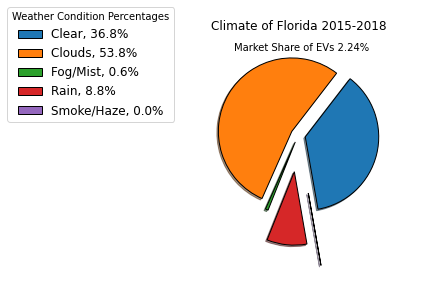

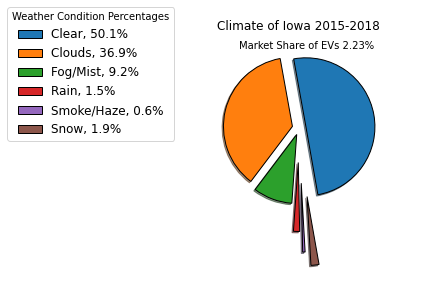

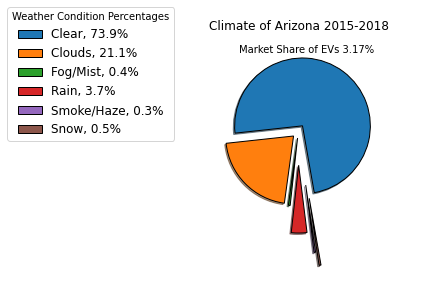

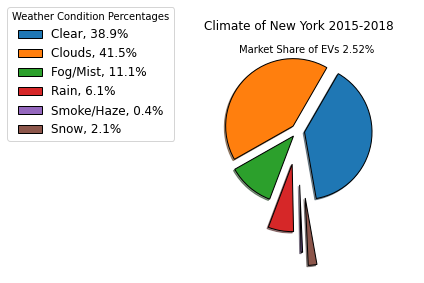

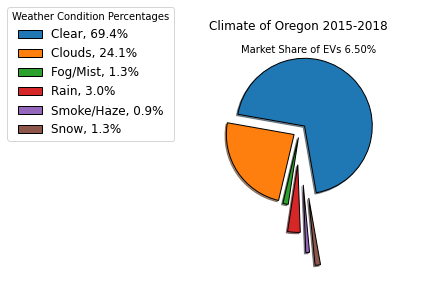

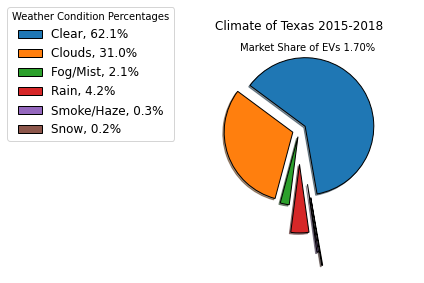

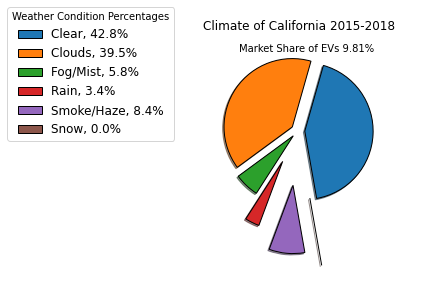

In [21]:
averages=[Averagefl,Averageia,Averageaz,Averageny,Averageor,Averagetx,Averageca]
states=["Florida", "Iowa", "Arizona", "New York", "Oregon", "Texas", "California"]
states2=["Florida", "Iowa", "Arizona", "NewYork", "Oregon", "Texas", "California"]
explode=[(0.1,0.1,0.1,.5,.8),(0.1,0.1,0.1,.5,.8,1),(0.1,0.1,0.1,.5,.8,1),(0.1,0.1,0.1,.5,.8,1),(0.1,0.1,0.1,.5,.8,1),(0.1,0.1,0.1,.5,.8,1),(0.1,0.1,0.1,.5,.8,1)]

for x in range(len(averages)):
    plt.pie(averages[x]["Days"], explode=explode[x],
            wedgeprops={"edgecolor":"0","linewidth": 1,"antialiased": True}, labeldistance=1.1, rotatelabels = 270, startangle=280, shadow=True)
    plt.axis('equal')
    plt.legend(averages[x]["Weather Condition"]+str(", ")+averages[x]["Percentage"],prop={'size':12},
               bbox_to_anchor=(0.0,1.2),title="Weather Condition Percentages", fontsize=8)
    plt.rcParams['font.size'] = 10
    plt.title(f"Climate of {states[x]} 2015-2018", y=1.05)
    plt.annotate(f'Market Share of EVs {marketsalesev.loc[marketsalesev["States"]==states2[x]]["2015-2018 All Market Share"].to_list()[0]}',(-0.87,1.15))
    plt.tight_layout()
    plt.savefig(f'Summaries Weather/Climate of {states[x]} 2015-2018 Pie')
    plt.show()
    

In [22]:
marketsalesev.loc[marketsalesev["States"]=="California"]["2015-2018 All Market Share"].to_list()[0]

'9.81%'

In [23]:
climates7 = pd.DataFrame(columns=["State","Climate Code", "Longitude", "Latitude", "EV Market Share %","EV Market Share No String"])



for x in range(len(states2)):
    k=str(climatecode.loc[climatecode["States"]==states2[x]]["Climate 1"].to_list()[0])+str(climatecode.loc[climatecode["States"]==states2[x]]["Climate 2"].to_list()[0])+str(climatecode.loc[climatecode["States"]==states2[x]]["Climate 3"].to_list()[0])
    climates7=climates7.append({"State":states[x],"Climate Code":k, 
                                "Longitude":reg_wth.loc[reg_wth["state_name"]==states[x]]["lon"].to_list()[0],
                               "Latitude":reg_wth.loc[reg_wth["state_name"]==states[x]]["lat"].to_list()[0],
                               "EV Market Share %": marketsalesev.loc[marketsalesev["States"]==states2[x]]["2015-2018 All Market Share"].to_list()[0]},ignore_index=True)
climates7["EV Market Share No String"] = climates7["EV Market Share %"].str.rstrip('%').astype('float')

In [24]:
climates7

,State,Climate Code,Longitude,Latitude,EV Market Share %,EV Market Share No String
0,Florida,CA,-81.515754,27.664827,2.24%,2.24
1,Iowa,CD,-93.097702,41.878003,2.23%,2.23
2,Arizona,BCD,-111.093731,34.048928,3.17%,3.17
3,New York,CD,-74.217933,43.299428,2.52%,2.52
4,Oregon,DCB,-120.554201,43.804133,6.50%,6.50
5,Texas,CB,-99.901813,31.968599,1.70%,1.70
6,California,BCD,-119.417932,36.778261,9.81%,9.81


In [25]:
gmaps.configure(api_key=g_key)
locations = climates7[["Latitude", "Longitude"]].astype(float)
MarketShare = climates7["EV Market Share No String"].astype(float)

In [26]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=MarketShare, 
                                 dissipating=False, max_intensity=9.81,
                                 point_radius = 2)
fig.add_layer(heat_layer)


fig

Figure(layout=FigureLayout(height='420px'))

In [27]:

locations2 = CoordCenterStates[["Latitude", "Longitude"]].astype(float)
MarketShare2 = CoordCenterStates["EV Market Share No String"].astype(float)

heat_layer2 = gmaps.heatmap_layer(locations2, weights=MarketShare2, 
                                 dissipating=False, max_intensity=9.81,
                                 point_radius = 2)
fig.add_layer(heat_layer2)


fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
CoordCenterStates

,States,Latitude,Longitude,EV Sales,EV Market Share No String
0,Alabama,32.318230,-86.902298,1.42%,1.42
1,Alaska,66.160507,-153.369141,1.88%,1.88
2,Arizona,34.048927,-111.093735,3.17%,3.17
3,Arkansas,34.799999,-92.199997,1.43%,1.43
4,California,36.778259,-119.417931,9.81%,9.81
5,Colorado,39.113014,-105.358887,3.57%,3.57
6,Connecticut,41.599998,-72.699997,3.01%,3.01
7,Delaware,39.000000,-75.500000,2.78%,2.78
8,Florida,27.994402,-81.760254,4.99%,4.99
9,Georgia,33.247875,-83.441162,2.24%,2.24
